To build a model which predicts sales based on the money spent on different platforms for marketing.

Use the advertising datasetand analyse the relationship using linear regression model.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("C:/Users/sairam/Downloads/datasets/advertising.csv")

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


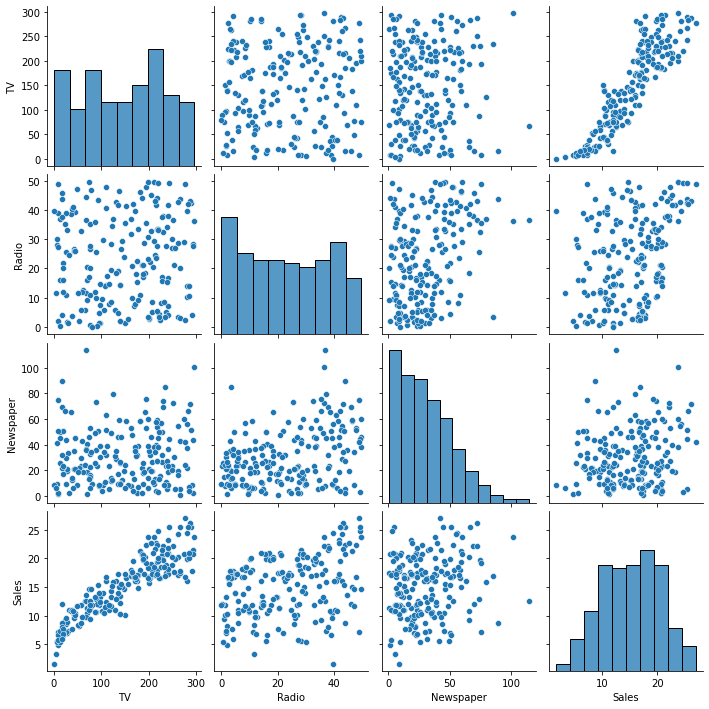

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [10]:
import statsmodels.formula.api as smf

In [11]:
model1=smf.ols('Sales~TV+Radio+Newspaper',df).fit()

In [12]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           8.13e-99
Time:                        15:31:39   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model_news=smf.ols('Sales~Newspaper',df).fit()
model_news.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.067
Date:                Sat, 02 Oct 2021   Prob (F-statistic):             0.0255
Time:                        15:33:15   Log-Likelihood:                -613.69
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9595      0.638     21.870      0.000      12.701      15.218
Newspaper      0.0383      0.017      2.251      0.025       0.005       0.072
==============================================================================
Omnibus:                       10.252   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.808
Skew:                          -0.111   Prob(JB):                       0.0903
Kurtosis:                       2.273   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

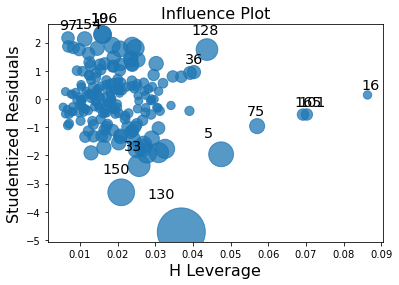

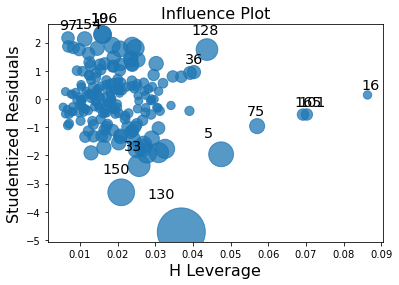

In [14]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [15]:
df[128:131]

,TV,Radio,Newspaper,Sales
128,220.3,49.0,3.2,24.7
129,59.6,12.0,43.1,9.7
130,0.7,39.6,8.7,1.6


In [16]:
df_new=df.drop([130],axis=0)

In [18]:
df_new[128:133]

,TV,Radio,Newspaper,Sales
128,220.3,49.0,3.2,24.7
129,59.6,12.0,43.1,9.7
131,265.2,2.9,43.0,17.7
132,8.4,27.2,2.1,5.7
133,219.8,33.5,45.1,19.6


In [19]:
model2=smf.ols('Sales~Newspaper+TV+Radio',df_new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     653.7
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          1.87e-101
Time:                        15:44:46   Log-Likelihood:                -371.18
No. Observations:                 199   AIC:                             750.4
Df Residuals:                     195   BIC:                             763.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7527      0.293     16.202      0.000       4.174       5.331
Newspaper     -0.0023      0.006     -0.420      0.675      -0.013       0.009
TV             0.0537      0.001     40.789      0.000       0.051       0.056
Radio          0.1114      0.008     13.727      0.000       0.095       0.127
==============================================================================
Omnibus:                        0.785   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.467
Skew:                          -0.036   Prob(JB):                        0.792
Kurtosis:                       3.226   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
rsq_news=smf.ols('Newspaper~TV+Radio',data=df_new).fit().rsquared
rsq_news

0.13145820246188356

In [27]:
vif_news=1/(1-rsq_news)
vif_news

1.1513550675793636

In [28]:
rsq_tv=smf.ols('TV~Radio+Newspaper',data=df_new).fit().rsquared
rsq_tv

0.004938077885829784

In [29]:
vif_tv=1/(1-rsq_tv)
vif_tv

1.0049625835097158

In [30]:
rsq_radi=smf.ols('Radio~Newspaper+TV',data=df_new).fit().rsquared
rsq_radi

0.13308459722229748

In [31]:
vif_radi=1/(1-rsq_radi)
vif_radi

1.153515091317882

In [32]:
ser={'vif':['vif_news','vif_tv','vif_radi'],'values':[vif_news,vif_tv,vif_radi]}

In [33]:
frame=pd.DataFrame(ser)

In [34]:
frame

,vif,values
0,vif_news,1.151355
1,vif_tv,1.004963
2,vif_radi,1.153515


In [35]:
model2=smf.ols('Sales~TV+Radio',data=df_new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     984.7
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          5.75e-103
Time:                        16:04:12   Log-Likelihood:                -371.27
No. Observations:                 199   AIC:                             748.5
Df Residuals:                     196   BIC:                             758.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7121      0.276     17.047      0.000       4.167       5.257
TV             0.0537      0.001     40.878      0.000       0.051       0.056
Radio          0.1102      0.008     14.580      0.000       0.095       0.125
==============================================================================
Omnibus:                        0.784   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.465
Skew:                          -0.024   Prob(JB):                        0.793
Kurtosis:                       3.232   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
pred1=model2.predict(df_new)

In [37]:
pred1

0      21.227956
1      11.432059
2      10.694308
3      17.395232
4      15.606071
         ...    
195     7.170111
196    10.307918
197    15.236794
198    24.562245
199    18.116879
Length: 199, dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
mse=mean_squared_error(df_new['Sales'],pred1)
rsq=r2_score(df_new['Sales'],pred1)

In [43]:
print(mse)
print(rsq)

2.443503451094123
0.909482849427282


In [44]:
np.sqrt(mse)

1.5631709602900519

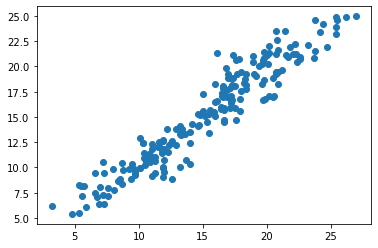

In [48]:
plt.scatter(df_new['Sales'],pred1)

(array([ 1.,  1., 10., 15., 30., 52., 45., 21., 12., 12.]),
 array([-3.30738562, -2.74167469, -2.17596376, -1.61025283, -1.0445419 ,
        -0.47883098,  0.08687995,  0.65259088,  1.21830181,  1.78401274,
         2.34972367]),
 <BarContainer object of 10 artists>)

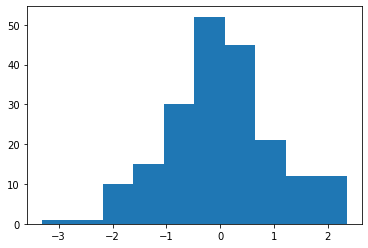

In [50]:
plt.hist(model2.resid_pearson)

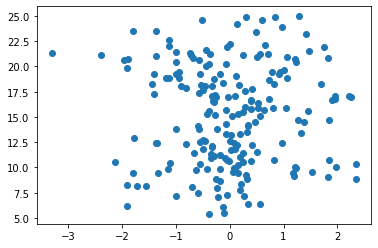

In [51]:
plt.scatter(model2.resid_pearson,pred1)

((array([-2.69903027, -2.38934184, -2.21281445, -2.08640125, -1.98653327,
         -1.90326486, -1.83142022, -1.76794741, -1.71088932, -1.65891263,
         -1.61106641, -1.56664753, -1.52512087, -1.48606926, -1.4491609 ,
         -1.41412738, -1.38074833, -1.34884049, -1.31824974, -1.2888452 ,
         -1.26051467, -1.23316124, -1.20670061, -1.18105893, -1.15617113,
         -1.13197959, -1.10843298, -1.08548542, -1.06309567, -1.04122654,
         -1.01984438, -0.9989186 , -0.97842135, -0.95832713, -0.93861261,
         -0.9192563 , -0.90023843, -0.88154071, -0.86314621, -0.84503924,
         -0.82720517, -0.80963039, -0.79230221, -0.77520872, -0.7583388 ,
         -0.74168198, -0.72522845, -0.70896896, -0.69289477, -0.67699765,
         -0.66126982, -0.64570388, -0.63029285, -0.61503009, -0.59990928,
         -0.5849244 , -0.57006973, -0.55533981, -0.54072941, -0.52623354,
         -0.51184741, -0.49756645, -0.48338625, -0.4693026 , -0.45531142,
         -0.44140882, -0.42759101, -0.

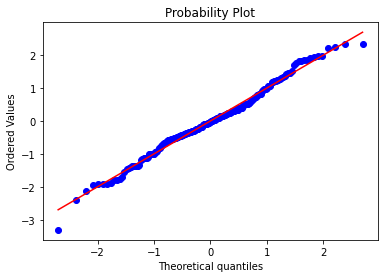

In [52]:
import pylab
import scipy.stats as st
st.probplot(model2.resid_pearson,dist='norm',plot=pylab)